In [31]:
import os
import sqlite3
from pathlib import Path
import pandas as pd
import shutil
import io

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Partition Data

In [21]:
# Load bounding box ids
sqlite_path = Path("metadata/cartoons.sqlite")
bounding_box_query = "SELECT DISTINCT B.id FROM BoundingBoxes AS B"
con = sqlite3.connect(sqlite_path)
bounding_box_ids = pd.read_sql_query(bounding_box_query, con)["id"].to_list()

In [88]:
# Copy bounding box files to directory
in_data_dir = Path("data")
data_dir = Path("partitioned_data") / "vision_data"

for cid in bounding_box_ids:
    image_path = in_data_dir / f"{cid}.jpg"
    shutil.copy(image_path, data_dir)

# Call Google Vision API

In [39]:
# Set environment variable for credentials
%env GOOGLE_APPLICATION_CREDENTIALS=/home/sam/cartoons-nlp-f701efe30203.json

# Instantiates a client
client = vision.ImageAnnotatorClient()

env: GOOGLE_APPLICATION_CREDENTIALS=/home/sam/cartoons-nlp-f701efe30203.json


In [71]:
def google_vision(image_path):
    # Loads the image into memory
    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = types.Image(content=content)

    # Performs label detection on the image file
    response = client.text_detection(image=image)

    return response

In [89]:
cid = 2177
image_path = data_dir / f"{cid}.jpg"

response = google_vision(image_path)

In [82]:
# labels = response.label_annotations

# print('Labels:')
# for label in labels:
#     print(label.description)

labels

[mid: "/m/0215n"
description: "Cartoon"
score: 0.9766926169395447
topicality: 0.9766926169395447
, mid: "/m/03jm5"
description: "House"
score: 0.8878894448280334
topicality: 0.8878894448280334
, mid: "/m/07s6nbt"
description: "Text"
score: 0.8524878621101379
topicality: 0.8524878621101379
, mid: "/m/0919rx"
description: "Line art"
score: 0.8412624001502991
topicality: 0.8412624001502991
, mid: "/m/05nnm"
description: "Organism"
score: 0.7941054701805115
topicality: 0.7941054701805115
, mid: "/m/01n6fd"
description: "Shed"
score: 0.7864498496055603
topicality: 0.7864498496055603
, mid: "/m/01l0mw"
description: "Home"
score: 0.7773481607437134
topicality: 0.7773481607437134
, mid: "/m/01kr8f"
description: "Illustration"
score: 0.7438470125198364
topicality: 0.7438470125198364
, mid: "/m/01g6gs"
description: "Black-and-white"
score: 0.6834213137626648
topicality: 0.6834213137626648
, mid: "/m/03r_vp"
description: "Adaptation"
score: 0.6696612238883972
topicality: 0.6696612238883972
]

In [94]:
# text = response.text_annotations
text

[locale: "en"
description: "NO,ILL\nINSTALL THE WON\'T!\nSECURITYILL O\nSY5TEM!\nNOT YOU!\nNo, YOU\nIT!!\n"
bounding_poly {
  vertices {
    x: 19
    y: 67
  }
  vertices {
    x: 227
    y: 67
  }
  vertices {
    x: 227
    y: 173
  }
  vertices {
    x: 19
    y: 173
  }
}
, description: "NO,ILL"
bounding_poly {
  vertices {
    x: 38
    y: 67
  }
  vertices {
    x: 91
    y: 67
  }
  vertices {
    x: 91
    y: 88
  }
  vertices {
    x: 38
    y: 88
  }
}
, description: "INSTALL"
bounding_poly {
  vertices {
    x: 19
    y: 89
  }
  vertices {
    x: 71
    y: 89
  }
  vertices {
    x: 71
    y: 109
  }
  vertices {
    x: 19
    y: 109
  }
}
, description: "THE"
bounding_poly {
  vertices {
    x: 79
    y: 89
  }
  vertices {
    x: 104
    y: 89
  }
  vertices {
    x: 104
    y: 109
  }
  vertices {
    x: 79
    y: 109
  }
}
, description: "WON\'T!"
bounding_poly {
  vertices {
    x: 119
    y: 89
  }
  vertices {
    x: 218
    y: 89
  }
  vertices {
    x: 218
    y: 

[mid: "/m/0215n"
description: "Cartoon"
score: 0.9766926169395447
topicality: 0.9766926169395447
, mid: "/m/03jm5"
description: "House"
score: 0.8878894448280334
topicality: 0.8878894448280334
, mid: "/m/07s6nbt"
description: "Text"
score: 0.8524878621101379
topicality: 0.8524878621101379
, mid: "/m/0919rx"
description: "Line art"
score: 0.8412624001502991
topicality: 0.8412624001502991
, mid: "/m/05nnm"
description: "Organism"
score: 0.7941054701805115
topicality: 0.7941054701805115
, mid: "/m/01n6fd"
description: "Shed"
score: 0.7864498496055603
topicality: 0.7864498496055603
, mid: "/m/01l0mw"
description: "Home"
score: 0.7773481607437134
topicality: 0.7773481607437134
, mid: "/m/01kr8f"
description: "Illustration"
score: 0.7438470125198364
topicality: 0.7438470125198364
, mid: "/m/01g6gs"
description: "Black-and-white"
score: 0.6834213137626648
topicality: 0.6834213137626648
, mid: "/m/03r_vp"
description: "Adaptation"
score: 0.6696612238883972
topicality: 0.6696612238883972
]

[locale: "en"
description: "NO,ILL\nINSTALL THE WON\'T!\nSECURITYILL O\nSY5TEM!\nNOT YOU!\nNo, YOU\nIT!!\n"
bounding_poly {
  vertices {
    x: 19
    y: 67
  }
  vertices {
    x: 227
    y: 67
  }
  vertices {
    x: 227
    y: 173
  }
  vertices {
    x: 19
    y: 173
  }
}
, description: "NO,ILL"
bounding_poly {
  vertices {
    x: 38
    y: 67
  }
  vertices {
    x: 91
    y: 67
  }
  vertices {
    x: 91
    y: 88
  }
  vertices {
    x: 38
    y: 88
  }
}
, description: "INSTALL"
bounding_poly {
  vertices {
    x: 19
    y: 89
  }
  vertices {
    x: 71
    y: 89
  }
  vertices {
    x: 71
    y: 109
  }
  vertices {
    x: 19
    y: 109
  }
}
, description: "THE"
bounding_poly {
  vertices {
    x: 79
    y: 89
  }
  vertices {
    x: 104
    y: 89
  }
  vertices {
    x: 104
    y: 109
  }
  vertices {
    x: 79
    y: 109
  }
}
, description: "WON\'T!"
bounding_poly {
  vertices {
    x: 119
    y: 89
  }
  vertices {
    x: 218
    y: 89
  }
  vertices {
    x: 218
    y: 

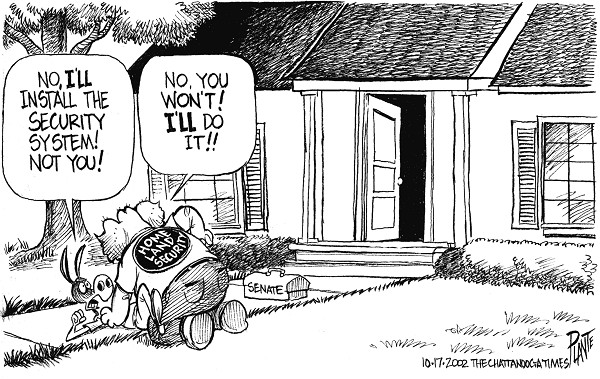

In [95]:
from IPython.display import Image
Image(str(image_path))